C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

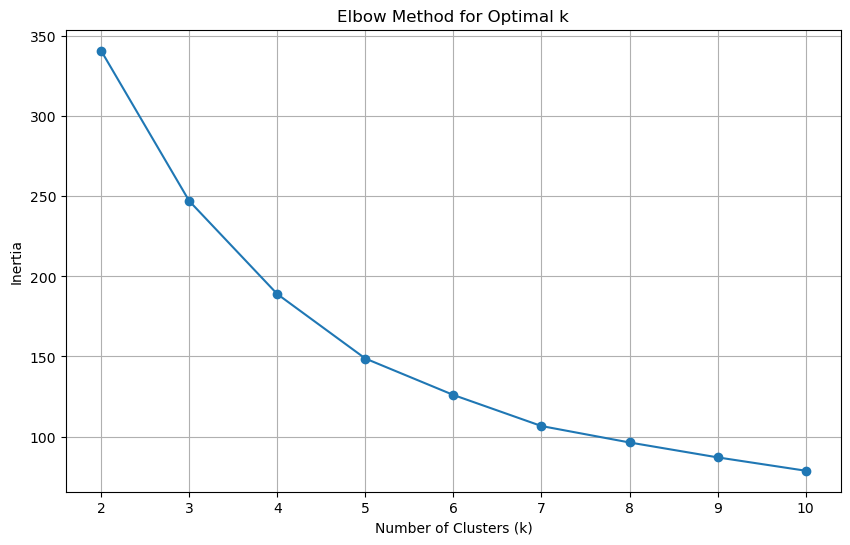

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


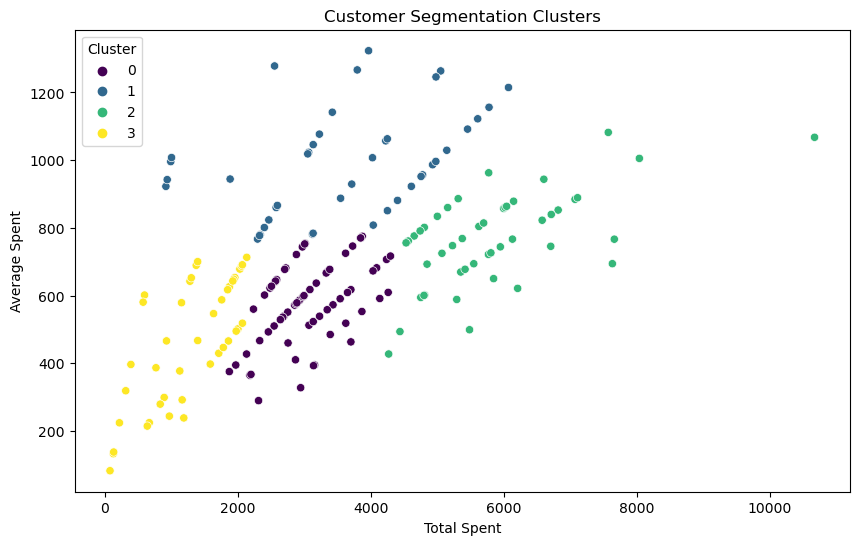

Number of clusters formed: 4
Davies-Bouldin Index: 0.9089
Silhouette Score: 0.3455


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets on CustomerID
merged_data = transactions.merge(customers, on="CustomerID")

# Feature Engineering: Create a summary for each customer
customer_summary = merged_data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_spent=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count")
).reset_index()

# Normalize features
features = customer_summary.drop("CustomerID", axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Choose k based on elbow method; assuming k=4 is chosen after analysis
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate DB Index and Silhouette Score
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_summary['Cluster'])

# Visualize clusters using a scatter plot (for first two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_summary['total_spent'], y=customer_summary['avg_spent'], hue=customer_summary['Cluster'], palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Average Spent')
plt.legend(title='Cluster')
plt.show()

# Reporting results
print(f"Number of clusters formed: {k_optimal}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
